# Laboratorio 2
### Entrega: jueves 6 de octubre, 23:59 horas


## Algunas Variables Aleatorias Especiales
En este laboratorio revisaremos algunos tipos de variables aleatorias especiales, definidas por que tienen  distribuciones de probabilidad conocidas. Trabajaremos tanto con v.a. discretas como continuas, y calcularemos y graficaremos las probabilidades teóricas (probabilidaes puntutales, funciones de  densidad y de distribución de probabilidad) y luego las vamos a comparar con datos obtenidos por simulación.

### Estadísticos asociados
1. Posición:  tendencia central y no central
   percentiles, media, moda

2. Dispersión: 
    Varianza, desviación estándar

3. Forma: 
    asimetría, curtosis. 
    
   $$\text{ Asimetría (skewness) }= \frac{E[(X-\mu)^3]}{\sigma^3}$$
   $$\text{ Curtosis }= \frac{E[(X-\mu)^4]}{\sigma^4} - 3$$

In [94]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

from IPython.core.pylabtools import figsize


#### Distribución Bernoulli
Suponga que se realiza un ensayo cuya salida es "éxito" o "falla". La v.a. entonces tiene sólo dos valores posibles: 1 si "éxito" 0 si no. Si $p$ es la probabilidad de éxito, entonces:

$\begin{equation}
\begin{array}{lll} 
P(X=1) & = &p \qquad y \qquad P(X=0) = 1-p \\
P(X = i) & = & p^i (1-p)^{1-i} \,, i=0,1\\
E[X] & = & 1*p + 0*(1-p) = p\\
E[X^2] & = & 1*p + 0*(1-p) = p\\
Var(X) & = & E[X^2] - (E[X])^2 = p - p^2 = p(1-p)\\
\end{array}
\end{equation}$


In [95]:
# k veces que sale cara
# n ensayos
# p exitoso
## aumentar el size para que se parezca mas


#### Distribución Binomial
Suponga que se realizan $N$  ensayos independientes idénticos  Bernoulli  de parámetro $p$. La v.a. X que representa el número $k$ de ensayos existosos entre los $N$ ensayos realizados, se denomina Binomial y cumple:

$\begin{equation}
\begin{array}{lll} 
P(X=k) & = & {N \choose k} p^k (1-p)^{N-k}, \qquad k=0,1,...N \\
E[X] & = & Np\\
Var(X) & = & Np(1-p)\\
Simetria(X) & = & \frac{1-2p}{\sqrt{np(1-p)}}\\
Curtosis(X) & = & \frac{1-6p(1-p)}{np(1-p)}\\
\end{array}
\end{equation}$

### Simulación Variable Aleatoria con Distribución Binomial
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución binomial, y se compara la distribución empírica con la distribución teórica

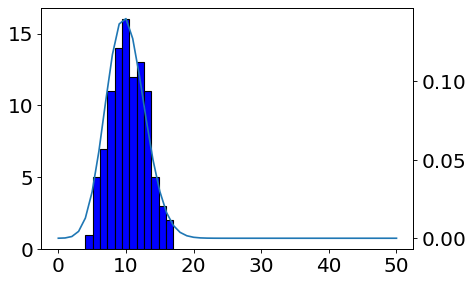

In [96]:
## simulación de size valores v.a. binomial
size=100
n=50
p=0.2
datos_bin =stats.binom.rvs(n=n, p=p, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_bin, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.pmf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


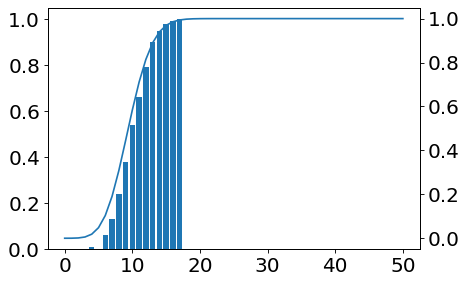

In [97]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_bin = ecdf(datos_bin)
ax.bar(x,cum_bin)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(51))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


In [98]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_bin)/size
var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
asim = stats.skew(datos_bin)
curtos = stats.kurtosis(datos_bin)
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

esperanza empírica: 10.36  teórica:  10.0
varianza empírica: 6.270400000000002  teórica:  8.0
asimetría empírica: 0.10071048732059763 teórica:  0.21213203435596423
curtosis empírico:  -0.30936270657127274 teórico:  0.004999999999999977


#### Ejercicio 1: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

#### Ejercicio 2: 
Realice un desarrollo similar al caso de la Distribución Binomial para el caso de una variable aleatoria con Distribución de Probabilidad Poisson

#### Distribución Normal o Gaussiana
Sea $X$ v.a. continua, es normal de media $\mu$ y varianza $\sigma^2$ y se denota $\cal{N}(\mu,\sigma^2)$ si su densidad de probabilidad cumple:


$\begin{equation}
\begin{array}{lll} 
f_X(x) & = & \frac{1}{\sqrt{2\pi}\sigma} exp(\frac{-(x-\mu)^2}{2\sigma^2})\qquad, -\infty < x <\infty\\
E[X] &= &\mu\\
Var(X)& =& \sigma^2\\
\end{array}
\end{equation}$

Esta es la distribución de probabilidad mas utilizada. Muchas variables se distribuyen aproximadamente normales (altura, peso, satisfacción en el trabajo, etc.). 

Permite modelar los errores o ruidos.

¿Cómo se verifica que una v.a. sigue una distribución normal?

Test de normalidad de Shapiro-Wilk, Q-Q plot


### Simulación Variable Aleatoria con Distribución Normal
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución normal, y se compara la distribución empírica con la distribución teórica

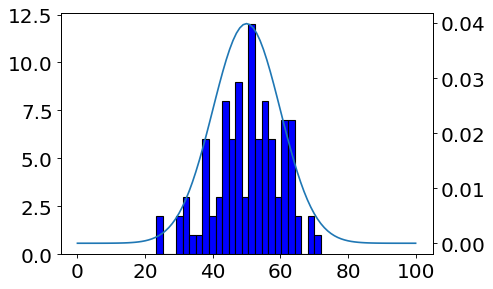

In [99]:
## simulación de size valores v.a. normal
size=100
mu=50
sigma=10
datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_norm, color = 'blue', edgecolor = 'black', bins = int(2*mu/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.pdf(x=i, loc=mu, scale= sigma))
ax2.plot(vec,pvec)
plt.draw()


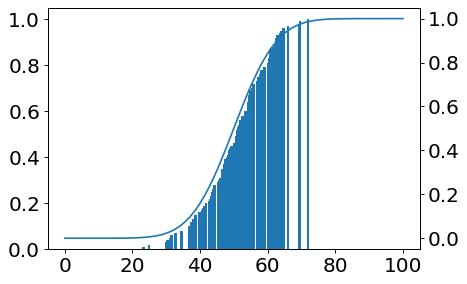

In [100]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_norm = ecdf(datos_norm)
ax.bar(x,cum_norm)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec)
plt.draw()


In [101]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_norm)/size
var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/size
asim = stats.skew(datos_norm)
curtos = stats.kurtosis(datos_norm)
print('esperanza empírica:',promedio,' teórica: ',mu)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)


esperanza empírica: 50.283885896429695  teórica:  50
varianza empírica: 99.6362375166231  teórica:  100
asimetría empírica: -0.3592049001294274 teórica:  0
curtosis empírico:  -0.15326929381509435 teórico:  0


#### Ejercicio 3: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

#### Ejercicio 4: 
Realice un desarrollo similar para el caso de una variable aleatoria continua distribuída t-student de $k$ grados de libertad

#### Ejercicio 5 (2 puntos):
Utilice datos de sismicidad del Centro de Sismológico Nacional (http://evtdb.csn.uchile.cl/events), escoja dos  regiones geográficas en Chile (y la región del océano Pacífico contigua), con dimensiones de al menos 5 grados, tanto en longitud como latitud y grafique los histogramas de magnitud y profundidad de los eventos sísmicos significativos disponibles. Calcule parámetros empíricos para cada serie de datos.  Compare y concluya.

### Respuesta
#### Consideraciones
<p>Se consideraron las siguientes regiones de Chile con sus parámetros.</p>
<ul>
<li><b>Atacama</b><br> lat, lon: (-26.018495, -70.534418) <br> lat, lon: (-29.431190, -69.974115)</li>
<li><b>Coquimbo</b><br> lat, lon: ( -29.279461, -71.483410) <br> lat, lon: (-32.110428, -70.252825)</li>
</ul>
<p>Además se utilizaron los parámetros default de la página de sismos, es decir:</p>
<p><b>Fecha:</b> 2012/01/01 - 2022/10/03 <br> <b>Profundidad:</b> 0 - 500 <br> <b>Magnitud:</b> 3 - 9</p>
<p>Para la extracción de datos, una vez hecha la consulta en la página, se utilizó el código de <b>scrap.js</b>, el cuál es un código 'semi-manual' que obtiene los datos y los guarda como archivo csv. Para replicar su uso se debe haber hecho la consulta con los parámetros, para luego abrir la consola del navegador <b>(F12 > console)</b>, pegar y ejecutar el código en la consola, luego solo resta guardar el archivo donde queramos.</p>


#### Definimos un plot genérico de histograma y una función para obtener los datos empíricos

In [169]:
def plotHistSismos(dataFrame, name):
    """
    Funcion generica que grafíca histograma  para un dataFrame que contenga 'Profundiad [km]' y 'Magnitud [*]'
    Recibe el dataframe con los datos y un nombre para el gráfico
    Output: Gráfico de histograma
    """
    fig, ax = plt.subplots(1, 2,figsize=(14, 6), dpi=80)
    weights_Magnitud = np.ones_like(dataFrame['Magnitud [*]']) / len(dataFrame['Magnitud [*]'])
    ax[0].hist(dataFrame['Magnitud [*]'], color = 'blue', edgecolor = 'black', bins = 20)

    #Titulo e Informacion
    ax[0].set_title(f'Histograma de Magnitud [*] {name}', fontsize=20)
    ax[0].set_xlabel('Magnitud [*]')
    ax[0].set_ylabel('Frecuencia')
    
    ax[0].hist(dataFrame['Magnitud [*]'], color = 'blue', edgecolor = 'black', bins = 20,weights=weights_Magnitud)

    # Repetimos para Profundidad
    weights_Profundidad = np.ones_like(dataFrame['Profundidad [km]']) / len(dataFrame['Profundidad [km]'])
    ax[1].hist(dataFrame['Profundidad [km]'], color = 'blue', edgecolor = 'black', bins = 20)

    #Titulo e Informacion
    ax[1].set_title(f'Histograma de Profundidad [km] {name}', fontsize=20)
    ax[1].set_xlabel('Profundidad [km]')
    ax[1].set_ylabel('Frecuencia')
    plt.draw()

# Función de información empírica de los sismos
def infoEmpiricosSismos(dataFrame, col):
    """
    Recibe el dataframe con los datos y el nombre de la columna a analizar
    Función que calcula y muestra la información empírica tales como: promedio, varianza, asimetría y curtosis.
    Output: promedio, varianza, asimetría, curtosis
    """
    # Aprovechamos a utilizar las funciones mean y var de pandas
    promedio = dataFrame[col].mean()
    varianza = dataFrame[col].var(ddof=0) # 0 grados de libertad
    asim = stats.skew(dataFrame[col])
    curtos = stats.kurtosis(dataFrame[col])

    print(f'Datos de {col}:')
    print('Esperanza Empírica:', promedio)
    print('Varianza Empírica:', varianza)
    print('Asimetría Empírica:', asim,)
    print('Curtosis Empírico: ', curtos)
    print('Mediana: ', dataFrame[col].median(),"\n\n")
    return promedio, varianza, asim, curtos

### Atacama

In [154]:
import pandas as pd
# Creamos el dataframe con los datos de Atacama
dfAtacama = pd.read_csv('dataSismosAtacama.csv')
dfAtacama.head()
print(f'El dataframe contempla {len(dfAtacama)} sismos en la región de Atacama')

El dataframe contempla 51 sismos en la región de Atacama


#### Datos empíricos de Atacama

Datos de Magnitud [*]:
Esperanza Empírica: 4.288235294117648
Varianza Empírica: 0.39476355247981537
Asimetría Empírica: 1.0750292595592326
Curtosis Empírico:  0.6502672336539579
Mediana:  4.1 


Desviación Estándar:  0.6345540351533601 


Datos de Profundidad [km]:
Esperanza Empírica: 87.76470588235294
Varianza Empírica: 310.1407151095732
Asimetría Empírica: -1.3002116044130894
Curtosis Empírico:  2.0150221514333495
Mediana:  90.0 


Desviación Estándar:  17.786048729601657 




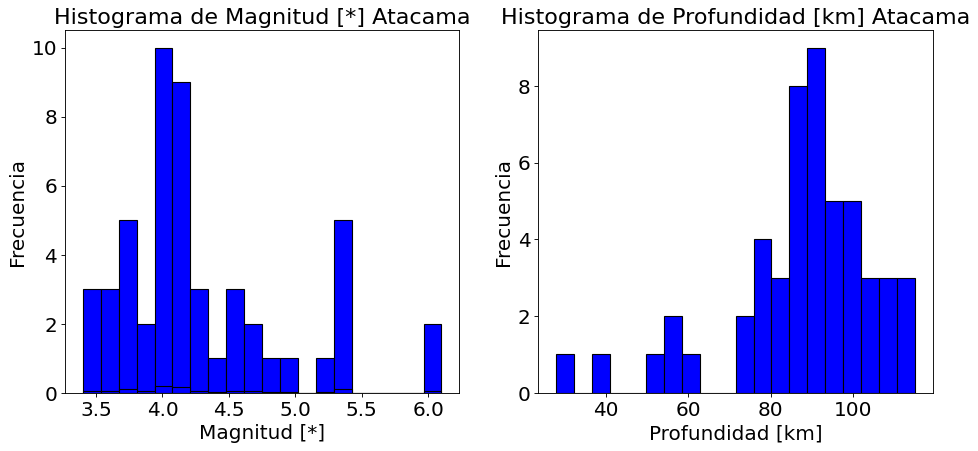

In [170]:
plotHistSismos(dfAtacama, 'Atacama')
promedioAtacama_Mag, varianzaAtacama_Mag, asimetriaAtacama_Mag, curtosisAtacama_Mag  = infoEmpiricosSismos(dfAtacama, 'Magnitud [*]')
promedioAtacama_Prof, varianzaAtacama_Prof, asimetriaAtacama_Prof, curtosisAtacama_Prof  = infoEmpiricosSismos(dfAtacama, 'Profundidad [km]')

### Coquimbo

In [105]:
dfCoquimbo = pd.read_csv('dataSismosCoquimbo.csv')
dfCoquimbo.head()
print(f'El dataframe contempla {len(dfCoquimbo)} sismos en la región de Coquimbo')

El dataframe contempla 532 sismos en la región de Coquimbo


#### Datos empíricos de Coquimbo

Datos de Magnitud [*]:
Esperanza Empírica: 4.315225563909774
Varianza Empírica: 0.3348997611509978
Asimetría Empírica: 0.7534097625047433
Curtosis Empírico:  1.4265102203236326
Mediana:  4.3 


Datos de Profundidad [km]:
Esperanza Empírica: 54.75375939849624
Varianza Empírica: 235.98259864887783
Asimetría Empírica: 1.531466311831665
Curtosis Empírico:  5.811106265372688
Mediana:  52.0 




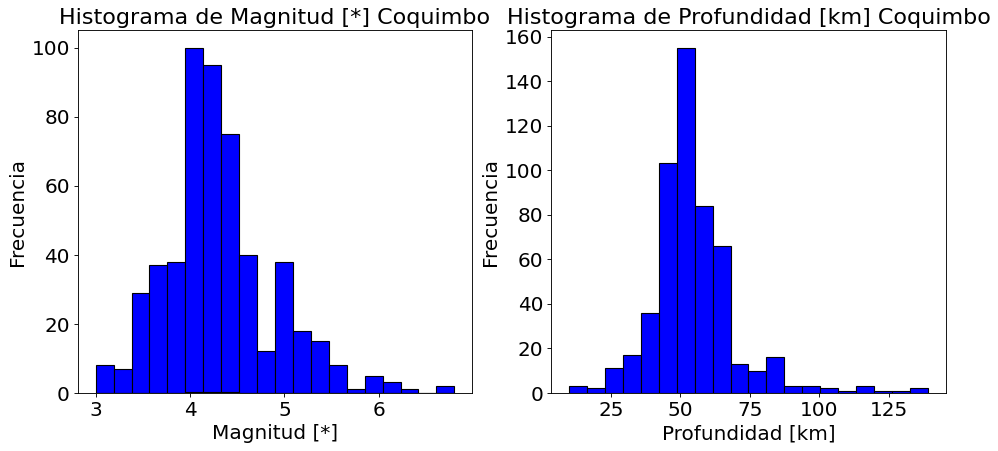

In [156]:
plotHistSismos(dfCoquimbo,'Coquimbo')
promedioCoquimbo_Mag, varianzaCoquimbo_Mag, asimetriaCoquimbo_Mag, curtosisCoquimbo_Mag = infoEmpiricosSismos(dfCoquimbo, 'Magnitud [*]')
promedioCoquimbo_Prof, varianzaCoquimbo_Prof, asimetriaCoquimbo_Prof, curtosisCoquimbo_Prof = infoEmpiricosSismos(dfCoquimbo, 'Profundidad [km]')


### Comparativa Atacama vs Coquimbo Magnitud: 51 sismos vs 532 sismos registrados

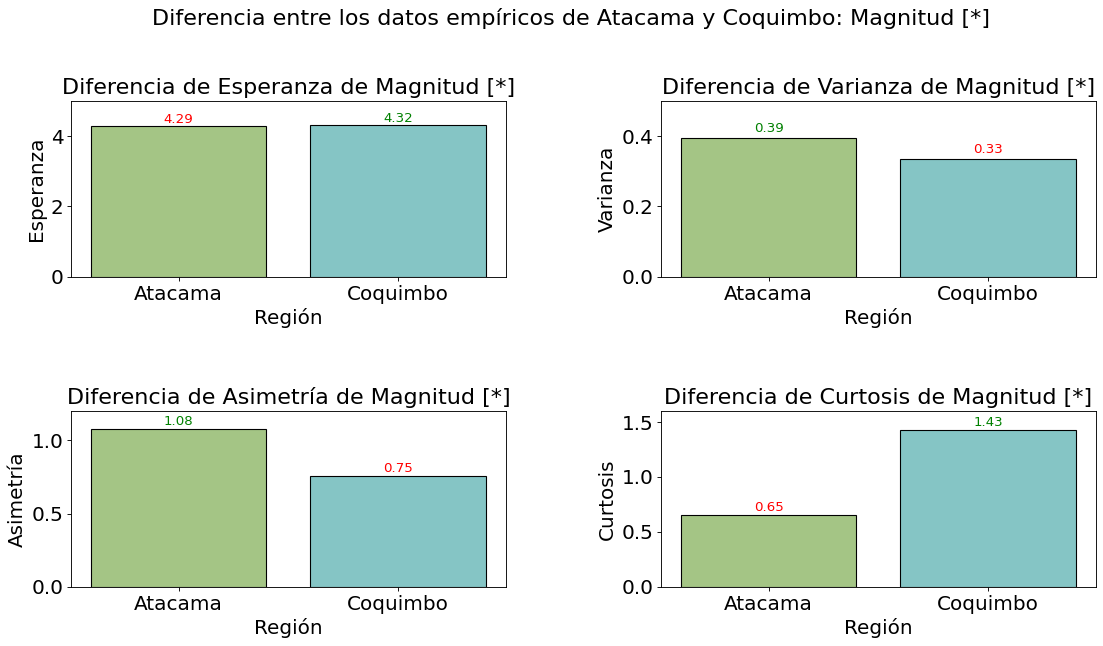

In [148]:
# Plot de la diferencia entre los datos empíricos de Atacama y Coquimbo
color_Atacama_Coquimbo = ['#a4c585','#85c5c5']
fig, ax = plt.subplots(2, 2,figsize=(16, 9), dpi=80)
fig.tight_layout(pad=5.0)
fig.suptitle('Diferencia entre los datos empíricos de Atacama y Coquimbo: Magnitud [*]', fontsize=20)
# Sección 1 : Esperanza empírica Magnitud [*] Atacama vs Coquimbo (sup, izq)
ax[0,0].bar(['Atacama', 'Coquimbo'], [promedioAtacama_Mag, promedioCoquimbo_Mag], color = color_Atacama_Coquimbo, edgecolor = 'black')
ax[0,0].set_title('Diferencia de Esperanza de Magnitud [*]', fontsize=20)
ax[0,0].set_xlabel('Región')
ax[0,0].set_ylabel('Esperanza')
ax[0,0].set_ylim(0, 5)
# Añadimos texto encima de los datos, para contextualizar mejor
ax[0,0].text(0, promedioAtacama_Mag+0.01, round(promedioAtacama_Mag,2), ha='center', va='bottom', color='red', fontsize=12)
ax[0,0].text(1, promedioCoquimbo_Mag+0.01, round(promedioCoquimbo_Mag,2), ha='center', va='bottom', color='green', fontsize=12)

# Sección 2 : Varianza empírica Magnitud [*] Atacama vs Coquimbo (sup, der)
ax[0,1].bar(['Atacama', 'Coquimbo'], [varianzaAtacama_Mag, varianzaCoquimbo_Mag], color = color_Atacama_Coquimbo, edgecolor = 'black')
ax[0,1].set_title('Diferencia de Varianza de Magnitud [*]', fontsize=20)
ax[0,1].set_xlabel('Región')
ax[0,1].set_ylabel('Varianza')
ax[0,1].set_ylim(0, .5)

ax[0,1].text(0, varianzaAtacama_Mag+0.01, round(varianzaAtacama_Mag,2), ha='center', va='bottom', color='green', fontsize=12)
ax[0,1].text(1, varianzaCoquimbo_Mag+0.01, round(varianzaCoquimbo_Mag,2), ha='center', va='bottom', color='red', fontsize=12)

# Sección 3 : Asimetría empírica Magnitud [*] Atacama vs Coquimbo (inf, izq)
ax[1,0].bar(['Atacama', 'Coquimbo'], [asimetriaAtacama_Mag, asimetriaCoquimbo_Mag], color = color_Atacama_Coquimbo, edgecolor = 'black')
ax[1,0].set_title('Diferencia de Asimetría de Magnitud [*]', fontsize=20)
ax[1,0].set_xlabel('Región')
ax[1,0].set_ylabel('Asimetría')
ax[1,0].set_ylim(0, 1.2)

ax[1,0].text(0, asimetriaAtacama_Mag+0.01, round(asimetriaAtacama_Mag,2), ha='center', va='bottom', color='green', fontsize=12)
ax[1,0].text(1, asimetriaCoquimbo_Mag+0.01, round(asimetriaCoquimbo_Mag,2), ha='center', va='bottom', color='red', fontsize=12)

# Sección 4 : Curtosis empírica Magnitud [*] Atacama vs Coquimbo (inf, der)
ax[1,1].bar(['Atacama', 'Coquimbo'], [curtosisAtacama_Mag, curtosisCoquimbo_Mag], color = color_Atacama_Coquimbo, edgecolor = 'black')
ax[1,1].set_title('Diferencia de Curtosis de Magnitud [*]', fontsize=20)
ax[1,1].set_xlabel('Región')
ax[1,1].set_ylabel('Curtosis')
ax[1,1].set_ylim(0, 1.6)

ax[1,1].text(0, curtosisAtacama_Mag+0.01, round(curtosisAtacama_Mag,2), ha='center', va='bottom', color='red', fontsize=12)
ax[1,1].text(1, curtosisCoquimbo_Mag+0.01, round(curtosisCoquimbo_Mag,2), ha='center', va='bottom', color='green', fontsize=12);

#### Esperanza Magnitud
<p> En la esperanza o promedio de las magnitudes es muy similar para ambas Regiones de la Zona Norte, con una muy pequeña diferencia de 0.03 puntos en la magnitud, siendo levemente mayor en Coquimbo, dándonos a entender que en promedio un terremoto en estas zonas sería de ~ 4.3.</p>

#### Varianza Magnitud
<p> La varianza es mayor en 0.06 'puntos' en Atacama, esta diferencia puede haber aumentado dado la diferencia de datos que se analizan, pero sin cuestionar esa parte, significaría que los sismos en Atacama pueden tener una mayor variación entre leves y medios sismos, aún así indica que es muy pequeña diferencia</p>

#### Asimetría Magnitud
<p> No está graficado pero las medianas son 4.1 y 4.3 respectivamente. Esto junto a la información de esperanza y de simetría, nos da a entender que el histograma de Atacama está más cargado a la izquierda, esto quiere decir que la curva va hacia sismos más pequeños. A diferencia de Coquimbo, el cuál podríamos suponer que si bien tiene muchos sismos pequeños, no está tan cargado a la izquierda como Atacama (por lo tanto los sismos más frecuentes podrían ser un poco más fuertes).</p>

#### Curtosis Magnitud
<p>La curtosis nos dice la anchura de la distribución, en este caso al ser ambos positivos, indica que son Leptocurticas, es decir, tienen curvas grandes y pronunciadas, concentrando sus valores. Bajo esto podemos decir que Coquimbo presenta una curva mucho más pronunciada (ej: frecuencia de sismos entre 3.9-4.3) que Atacama, la que sería un poco más plana que Coquimbo</p>

### Conclusión respecto a Magnitud
<p>Como podemos observar hay bastantes similitudes entre ambas, quizás están un poco más cargadas que el otro, o presentan una curva más pronunciada pero siempre conservando cierta similitud entre ambos datos, por lo menos así lo demuestra la dirección (simetría y curtosis) de la distribución, el promedio (cercano a 4.3) de los datos y varianza (cercabi a 0.356).</p>
<p>Ahora dados los datos, no olvidar que son 51 vs 532, eso nos da a entender que Coquimbo es, o ha sido entre 2012-2022, 10 veces más sísmico que Atacama, teniendo mayor frecuencia de terremotos 4.0 - 5.0 que Atacama</p>

### Comparativa Atacama vs Coquimbo Profundidad: 51 sismos vs 532 sismos registrados

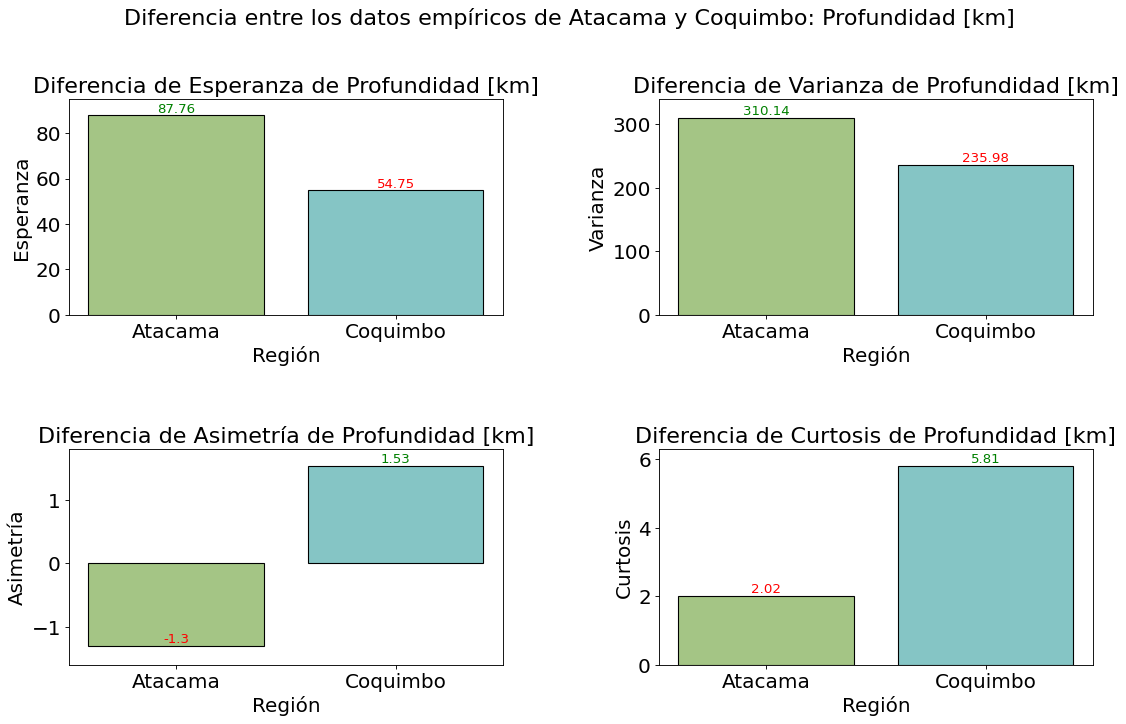

In [168]:
# Plot de la diferencia entre los datos empíricos de Atacama y Coquimbo
color_Atacama_Coquimbo = ['#a4c585','#85c5c5']
fig, ax = plt.subplots(2, 2,figsize=(16, 10), dpi=80)
fig.tight_layout(pad=5.0)
fig.suptitle('Diferencia entre los datos empíricos de Atacama y Coquimbo: Profundidad [km]', fontsize=20)
# Sección 1 : Esperanza empírica Profundidad [km] Atacama vs Coquimbo (sup, izq)
ax[0,0].bar(['Atacama', 'Coquimbo'], [promedioAtacama_Prof, promedioCoquimbo_Prof], color = color_Atacama_Coquimbo, edgecolor = 'black')
ax[0,0].set_title('Diferencia de Esperanza de Profundidad [km]', fontsize=20)
ax[0,0].set_xlabel('Región')
ax[0,0].set_ylabel('Esperanza')
ax[0,0].set_ylim(0, 95)

# Añadimos texto encima de los datos, para contextualizar mejor
ax[0,0].text(0, promedioAtacama_Prof+0.01, round(promedioAtacama_Prof,2), ha='center', va='bottom', color='green', fontsize=12)
ax[0,0].text(1, promedioCoquimbo_Prof+0.01, round(promedioCoquimbo_Prof,2), ha='center', va='bottom', color='red', fontsize=12)

# Sección 2 : Varianza empírica Profundidad [km] Atacama vs Coquimbo (sup, der)
ax[0,1].bar(['Atacama', 'Coquimbo'], [varianzaAtacama_Prof, varianzaCoquimbo_Prof], color = color_Atacama_Coquimbo, edgecolor = 'black')
ax[0,1].set_title('Diferencia de Varianza de Profundidad [km]', fontsize=20)
ax[0,1].set_xlabel('Región')
ax[0,1].set_ylabel('Varianza')
ax[0,1].set_ylim(0, 340)

ax[0,1].text(0, varianzaAtacama_Prof+0.01, round(varianzaAtacama_Prof,2), ha='center', va='bottom', color='green', fontsize=12)
ax[0,1].text(1, varianzaCoquimbo_Prof+0.01, round(varianzaCoquimbo_Prof,2), ha='center', va='bottom', color='red', fontsize=12)

# Sección 3 : Asimetría empírica Profundidad [km] Atacama vs Coquimbo (inf, izq)
ax[1,0].bar(['Atacama', 'Coquimbo'], [asimetriaAtacama_Prof, asimetriaCoquimbo_Prof], color = color_Atacama_Coquimbo, edgecolor = 'black')
ax[1,0].set_title('Diferencia de Asimetría de Profundidad [km]', fontsize=20)
ax[1,0].set_xlabel('Región')
ax[1,0].set_ylabel('Asimetría')
ax[1,0].set_ylim(-1.6, 1.8)

ax[1,0].text(0, asimetriaAtacama_Prof+0.01, round(asimetriaAtacama_Prof,2), ha='center', va='bottom', color='red', fontsize=12)
ax[1,0].text(1, asimetriaCoquimbo_Prof+0.01, round(asimetriaCoquimbo_Prof,2), ha='center', va='bottom', color='green', fontsize=12)

# Sección 4 : Curtosis empírica Profundidad [km] Atacama vs Coquimbo (inf, der)
ax[1,1].bar(['Atacama', 'Coquimbo'], [curtosisAtacama_Prof, curtosisCoquimbo_Prof], color = color_Atacama_Coquimbo, edgecolor = 'black')
ax[1,1].set_title('Diferencia de Curtosis de Profundidad [km]', fontsize=20)
ax[1,1].set_xlabel('Región')
ax[1,1].set_ylabel('Curtosis')
ax[1,1].set_ylim(0, 6.3)

ax[1,1].text(0, curtosisAtacama_Prof+0.01, round(curtosisAtacama_Prof,2), ha='center', va='bottom', color='red', fontsize=12)
ax[1,1].text(1, curtosisCoquimbo_Prof+0.01, round(curtosisCoquimbo_Prof,2), ha='center', va='bottom', color='green', fontsize=12);

#### Esperanza Profundidad
<p>La esperanza o promedio de Atacama es casi 30 km mayor a Coquimbo, los sismos que ocurren en Atacama suelen ser a mayor profundidad que en Coquimbo</p>

#### Varianza Profundidad
<p>La variación en Atacama es mayor, indicando justamente esto, los sismos en profundidad, pueden variar más que los de Coquimbo</p>

#### Asimetría Profundidad
<p>Aquí podemos ver una diferencia muy grande, ya que la asimetría de Atacama es negativa, esto quiere decir que se 'carga' hacia la derecha de su rango de datos, mientras que los datos de Coquimbo se centran a la izquierda de su rango de datos. En palabras humanas, Atacama puede tener sismos a poca profundidad pero sus sismos se centran a una profundidad mayor (entre 80km-100km) mientras que en Coquimbo, si bien también puede tener uno que otro sismo mayor (ej: 135km) sus sismos se centran entre 40km-60km </p>

#### Curtosis Profundidad
<p>La Curtosis de Coquimbo es mayor nuevamente, en este caso es casi 2.5 veces mayor que la de Atacama, indicando que los sismos en profundidad tienen una curva mucho más puntiaguda que la de Atacama, estando menos distribuidos entre el rango de profundidad que les corresponde y más concentrados en las medianas: 90km para Atacama y 52 km Coquimbo</p>

### Conclusión Profundidad
<p>Con esta información podemos decir que los sismos de Atacama, a pesar de que en magnitud eran similares, en temas de profundidad son muy distintos, siendo los de Atacama sismos bastantes más profundos que los de Coquimbo, con una diferencia cercana a los 30km (aprox. 80km Atacama, 50km Coquimbo). Esto en complemento a la proporción de 1:10 (sismos atacama:coquimbo), nos puede dar una noción de que los sismos en Coquimbo es probable que sean más fuertes dado que suelen estar a menor profundidad que los de Atacama.</p>

### Conclusión final
<p>Si está pensando vivir en la región de Atacama o Coquimbo pero le dan miedo los sismos, bajo lo analizado anteriormente, es altamente recomendable vivir en Atacama, ya que tiene menor probabilidad de sismos, y aunque ocurran, estos suelen ocurrir a gran profundidad.</p>
<p>Por el contrario si nunca ha vivido un sismo y por alguna razón quisiera sentir la experiencia, entre estas 2 regiones Coquimbo es su mejor opción, con casi 10 veces más sismos que Atacama en 10 años, y a la vez podrían percibirse más fuertes que los de Atacama, ya que estos ocurren a una menor profundidad. El riesgo se consideraría bajo dado la infraestructura chilena y que los sismos se centran en una magnitud de 4.0 - 4.5.</p>

### Referencias

https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb
